In [1]:
%matplotlib notebook
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.optimize import minimize

In [2]:
### Data from excercise

x_data=[0.32,0.57]
d_H_data=[78.4,96.6]
d_H_dev=[2.3,2.4]
d_V_data=[1270,2033]
d_V_dev=[14,21]
d_M_data=[1294,2179]
d_M_dev=[21,35]

Ωm=0.3156
h0=0.6727

z=0.32  d_m=1312.258084 d_v=1295.495663 H=74.835205
z=0.540000 d_m=2084.901044 d_v2047.001862 H=80.693489



La funzione è da valutare a 0.32 e a 0.57

Simpson integrale. Veloce e magico

In [3]:
### Functions of the distances

Hubble= lambda z, h , Ω : np.sqrt(Ω*pow(1.0+z,3)+(1.0-Ω))*h*100.
fP_dM = lambda z , h ,Ω : 299792.458/Hubble(z, h, Ω)
f_dM = lambda z, h , Ω : integrate.simpson(fP_dM(np.linspace(0,z,1000),h,Ω),np.linspace(0,z,1000))
f_dV= lambda z, h, Ω : pow((299792.458*z*(f_dM(z,h,Ω)**2)/Hubble(z,h,Ω)),1./3.)

In [4]:
z=3
Nmax=1000
x=np.linspace(0,z,Nmax)
integlist=[]
Rawd_V=[]
d_V=[]
d_H=[]
d_M=[]
for i in x:
    #tmp=integrate.simpson(func(np.linspace(0,i,Nmax)), np.linspace(0,i,Nmax))
    #integlist.append(tmp)
    #Rawd_V.append(3.1*pow(pow(tmp,2)/np.sqrt(0.3156*pow(1+i,3)+(1-0.3156)),1/3))
    d_V.append(f_dV(i,h0,Ωm))
    d_H.append(Hubble(i,h0,Ωm))
    d_M.append(f_dM(i,h0,Ωm))


d_M=np.array(d_M)    
d_V=np.array(d_V)
d_H=np.array(d_H)

#print(d_V[-1])
#print(d_M[-1])
#print(d_H[-1])

/home/heron/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:397: RuntimeWarning: invalid value encountered in true_divide
  h0divh1 = h0 / h1
/home/heron/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:399: RuntimeWarning: invalid value encountered in true_divide
  y[slice1]*hsum*hsum/hprod +


<IPython.core.display.Javascript object>


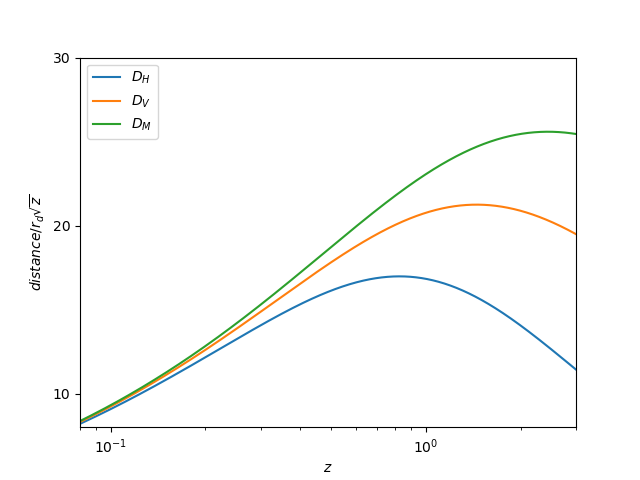

In [5]:
import math
fig = plt.figure()
plt.plot(x,299792.458*np.sqrt(x)/(147.78*d_H),label="$D_{H}$")
plt.plot(x,d_V/(147.78*np.sqrt(x)),label="$D_{V}$")
plt.plot(x,d_M/(147.78*np.sqrt(x)),label="$D_{M}$")
plt.xticks([0.1, 1,2])
plt.xscale('log')
plt.xlim(0.08, 3)
plt.ylim(8,30)
plt.ylabel('$distance/r_{d}\sqrt{z}$')
plt.xlabel('$z$')
plt.yticks([10,20,30])
plt.legend()
#plt.grid()
plt.show()

Punto 3
Grid e calcoli:

differenza max tra 0.3156 e il valore calcolato pari a sigma diviso radice di 12

In [6]:
def X2gen(ydata,yerr,xdata,feval):
    
    def X2(params):
        h=params[0]
        Ω=params[1]
        tmp=0
        for i in range(len(ydata)):
            tmp+=((feval(xdata[i],h,Ω)-ydata[i])/yerr[i])**2
        return tmp
    return X2

def FsumGen(a,b,c):
    def Fsum(params):
        return a(params)+b(params)+c(params)
    return Fsum

global xiter
xiter=[]

def store_callback(xs):
    """
    Callback called after every iteration.

    xs is the estimated location of the optimum.
    """
    xiter.append(xs)

In [7]:
a=X2gen(d_H_data,d_H_dev,x_data,Hubble)
b=X2gen(d_V_data,d_V_dev,x_data,f_dV)
c=X2gen(d_M_data,d_M_dev,x_data,f_dM)

Fsum=FsumGen(a,b,c)
init_point=[0.6727,0.3156]

global xiter
xiter=[]
res = minimize(Fsum, x0=init_point, method='BFGS', tol=1e-10,callback=store_callback)
print(res)


      fun: 2.325974912595695
 hess_inv: array([[ 0.00417138, -0.01088642],
       [-0.01088642,  0.0284164 ]])
      jac: array([1.01029873e-05, 4.26173210e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 146
      nit: 10
     njev: 47
   status: 2
  success: False
        x: array([0.66811666, 0.35874956])


In [50]:
res['x']

array([0.66811666, 0.35874956])

<IPython.core.display.Javascript object>


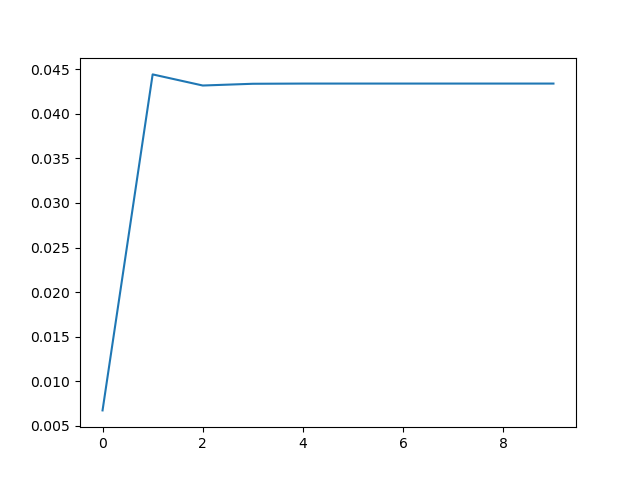

In [8]:
from numpy import linalg as LA
fig = plt.figure()

xiter=np.array(xiter)
Ynorm=LA.norm(xiter-init_point,axis=1)
plt.plot(range(len(Ynorm)),Ynorm)
plt.show()

In [181]:
#Plot ellissi di confidenza:

print(Fsum([h0,Ωm]))
print(Fsum(res['x']))

6.08943317263473
2.325974912595695


In [144]:
x = np.linspace(0.63,0.71,100)
y = np.linspace(0.2,0.55,100)
Value2σ=9.49
Value1σ=4.88

X2_1=[]
X2_2=[]
for i in x:
    for j in y:
        if Fsum([i,j])<Value2σ:
            X2_2.append([i,j])
            if Fsum([i,j])<Value1σ:
                X2_1.append([i,j])
X2_2=np.array(X2_2)
X2_1=np.array(X2_1)
X2_2center=[(np.max(X2_2[:,0])+np.min(X2_2[:,0]))/2,(np.max(X2_2[:,1])+np.min(X2_2[:,1]))/2]
X2_1center=[(np.max(X2_1[:,0])+np.min(X2_1[:,0]))/2,(np.max(X2_1[:,1])+np.min(X2_1[:,1]))/2]

In [187]:
(np.max(X2_2[:,0])-np.min(X2_2[:,0]))/2
(np.max(X2_1[:,0])-np.min(X2_1[:,0]))/2

0.020606060606060572

<IPython.core.display.Javascript object>


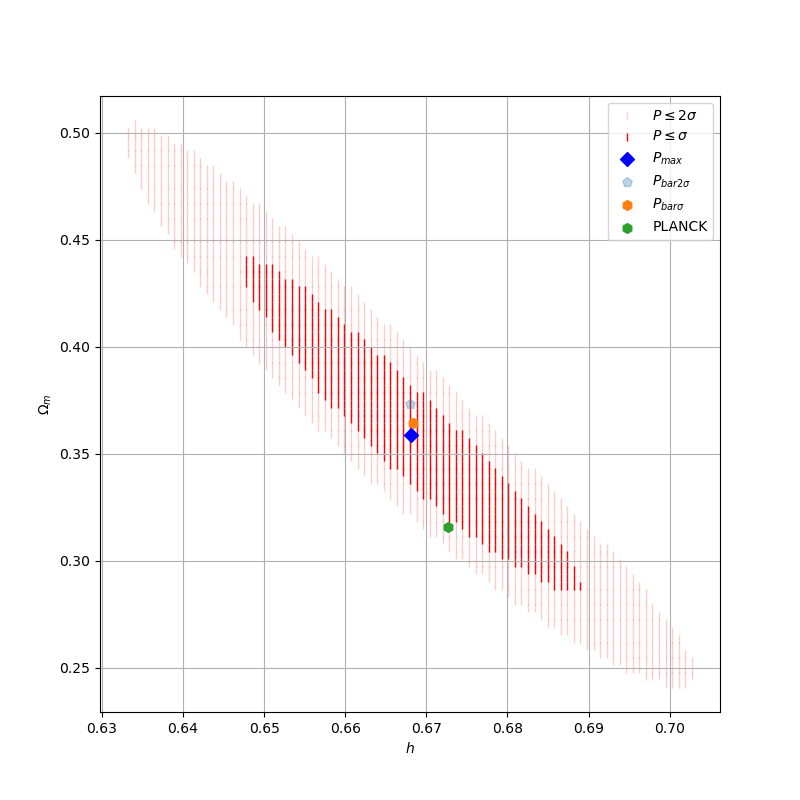

In [179]:
fig = plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(X2_2[:,0],X2_2[:,1],c="red", marker=(2,0), alpha=0.2,label='$P\leq2\sigma$')
plt.scatter(X2_1[:,0],X2_1[:,1],c="red",  marker=(2,0),alpha=1,label='$P\leq\sigma$')
plt.scatter(res['x'][0],res['x'][1],c="blue",label='$P_{max}$',marker=(4,0),s=100)
plt.scatter(X2_2center[0],X2_2center[1],alpha=0.3,label='$P_{bar 2\sigma}$',marker=(5,0),s=50)
plt.scatter(X2_1center[0],X2_1center[1],label='$P_{ bar \sigma}$',marker=(6,0),s=50)
plt.scatter(h0,Ωm,label='PLANCK',marker=(6,0),s=50)
plt.xlabel('$h$')
plt.ylabel('$\Omega_{m}$')
plt.grid()
plt.legend()
plt.show()

In [14]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
Ωarr=[]
harr=[]
Farr=[]
for j in np.linspace(0.63,0.71,100):
    for i in np.linspace(0.2,0.55,100):
        params=[j,i]
        harr.append(j)
        Ωarr.append(i)
        Farr.append(Fsum(params))
        

Ωarr=np.array(Ωarr)
harr=np.array(harr)

def unfolder(f):
    def unfoldedf(h,Ω):
        return f([h,Ω])
    return unfoldedf



x = np.linspace(0.63,0.71,10)
y = np.linspace(0.2,0.55,10)

X, Y = np.meshgrid(x, y)
FsumUnfolded=unfolder(Fsum)
Z = FsumUnfolded(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.show()

#Farr=np.array(Farr)
#ax.scatter3D(Ωarr, harr, Farr)
#plt.show()

<IPython.core.display.Javascript object>

ValueError: operands could not be broadcast together with shapes (10,10) (1000,) 

In [45]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

def unfolder(f):
    def unfoldedf(Ω, h):
        return f([h,Ω])
    return unfoldedf

x = np.linspace(0.63,0.71,40)
y = np.linspace(0.2,0.55,40)

X, Y = np.meshgrid(x, y)
FsumUnfolded=unfolder(Fsum)
Z = FsumUnfolded(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.show()

ValueError: operands could not be broadcast together with shapes (40,40) (1000,) 